# Visualization of asteroid positions in the sky as observed by Vera Rubin observatory

The code below generates a sky map from Vera Rubin data in the `../results/real_data` directory. It shows where the asteroids were first discovered in the sky.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../results/real_data/e2e.csv')
df_stats = pd.read_csv('../results/real_data/stats.csv')

In [5]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km
0,K05T38Q,60847.146782,259.031417,-16.841287,260.232304,-15.855056,0.000006,i,21.853584,0.040200,23.744599,3.849741,3.077702e+08,1.772955,4.576933e+08
1,K13Y17V,60847.146782,259.031417,-16.841287,258.550160,-16.755462,0.000005,i,21.552069,0.028546,23.796964,4.945961,2.279669e+08,4.637319,3.778706e+08
2,K09Y14Q,60847.148941,246.144506,-11.839659,244.723451,-11.375593,0.000006,i,22.082910,0.042914,23.891171,8.401714,3.250447e+08,9.561752,4.659760e+08
3,K09Y14Q,60847.149923,243.051811,-11.035343,244.723250,-11.375646,0.000006,i,22.012068,0.041572,23.931758,8.402015,3.250455e+08,9.564608,4.659760e+08
4,K09VA5D,60847.149923,243.051811,-11.035343,243.161196,-11.103452,0.000007,i,22.390791,0.053954,24.013578,8.572065,3.404382e+08,7.185043,4.799453e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734130,K17F07O,60885.390945,333.821544,-22.186877,333.952789,-20.934670,0.000012,r,22.057672,0.049398,23.763283,6.941493,3.680215e+08,-9.042299,5.105536e+08
6734131,K12C42G,60885.393706,333.139608,-13.288483,333.614374,-14.973119,0.000015,r,23.030433,0.086804,24.041526,6.491506,4.098109e+08,-9.426667,5.518323e+08
6734132,K06BO9X,60885.393706,333.139608,-13.288483,333.156259,-12.007646,0.000006,r,22.124542,0.035857,24.117687,7.424793,3.475611e+08,-9.461259,4.897423e+08
6734133,K24J43Z,60885.394155,332.936367,-10.261742,333.419155,-10.266468,0.000008,r,22.662157,0.051087,24.294248,7.905404,3.334031e+08,-7.879319,4.750350e+08


In [6]:
df_stats

,ObjID,optFilter,number_obs,min_apparent_mag,max_apparent_mag,median_apparent_mag,min_phase,max_phase,date_linked_MJD
0,J94C18H,g,5,21.329804,21.507975,21.471073,12.432972,15.604957,60867.0
1,J94C18H,i,9,19.778470,20.633100,20.277853,4.351409,14.675066,60867.0
2,J94C18H,r,8,20.279691,20.889882,20.715237,5.545533,15.611820,60867.0
3,J94C18H,u,2,22.155084,22.182194,22.168639,14.732619,15.314382,60867.0
4,J94C18H,y,2,19.579607,19.614988,19.597297,9.532175,9.532361,60867.0
...,...,...,...,...,...,...,...,...,...
1223683,K25N03E,i,9,21.117166,21.934682,21.532481,1.740963,13.617636,60860.0
1223684,K25N03E,r,9,21.646617,22.420278,21.768194,2.985428,13.610949,60860.0
1223685,K25N03E,u,3,23.014537,23.061720,23.048797,2.716729,4.120416,60860.0
1223686,K25N03E,y,7,21.010937,21.326255,21.084663,7.843799,9.249904,60860.0


In [7]:
df_disc = df_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()

In [8]:
df_disc

,ObjID,date_linked_MJD
0,J02Y00E,60869.0
1,J05B00D,60874.0
2,J05F00C,60876.0
3,J06V00M,60875.0
4,J12D00B,60865.0
...,...,...
203943,T3S5151,60863.0
203944,T3S5177,60869.0
203945,T3S5182,60865.0
203946,T3S5184,60865.0


In [9]:
df['night'] = (df['fieldMJD_TAI'] - 60847).astype('int')

In [10]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night
0,K05T38Q,60847.146782,259.031417,-16.841287,260.232304,-15.855056,0.000006,i,21.853584,0.040200,23.744599,3.849741,3.077702e+08,1.772955,4.576933e+08,0
1,K13Y17V,60847.146782,259.031417,-16.841287,258.550160,-16.755462,0.000005,i,21.552069,0.028546,23.796964,4.945961,2.279669e+08,4.637319,3.778706e+08,0
2,K09Y14Q,60847.148941,246.144506,-11.839659,244.723451,-11.375593,0.000006,i,22.082910,0.042914,23.891171,8.401714,3.250447e+08,9.561752,4.659760e+08,0
3,K09Y14Q,60847.149923,243.051811,-11.035343,244.723250,-11.375646,0.000006,i,22.012068,0.041572,23.931758,8.402015,3.250455e+08,9.564608,4.659760e+08,0
4,K09VA5D,60847.149923,243.051811,-11.035343,243.161196,-11.103452,0.000007,i,22.390791,0.053954,24.013578,8.572065,3.404382e+08,7.185043,4.799453e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734130,K17F07O,60885.390945,333.821544,-22.186877,333.952789,-20.934670,0.000012,r,22.057672,0.049398,23.763283,6.941493,3.680215e+08,-9.042299,5.105536e+08,38
6734131,K12C42G,60885.393706,333.139608,-13.288483,333.614374,-14.973119,0.000015,r,23.030433,0.086804,24.041526,6.491506,4.098109e+08,-9.426667,5.518323e+08,38
6734132,K06BO9X,60885.393706,333.139608,-13.288483,333.156259,-12.007646,0.000006,r,22.124542,0.035857,24.117687,7.424793,3.475611e+08,-9.461259,4.897423e+08,38
6734133,K24J43Z,60885.394155,332.936367,-10.261742,333.419155,-10.266468,0.000008,r,22.662157,0.051087,24.294248,7.905404,3.334031e+08,-7.879319,4.750350e+08,38


In [11]:
df['dateMJD'] = (df['fieldMJD_TAI'].astype('int')).astype('float')

In [12]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night,dateMJD
0,K05T38Q,60847.146782,259.031417,-16.841287,260.232304,-15.855056,0.000006,i,21.853584,0.040200,23.744599,3.849741,3.077702e+08,1.772955,4.576933e+08,0,60847.0
1,K13Y17V,60847.146782,259.031417,-16.841287,258.550160,-16.755462,0.000005,i,21.552069,0.028546,23.796964,4.945961,2.279669e+08,4.637319,3.778706e+08,0,60847.0
2,K09Y14Q,60847.148941,246.144506,-11.839659,244.723451,-11.375593,0.000006,i,22.082910,0.042914,23.891171,8.401714,3.250447e+08,9.561752,4.659760e+08,0,60847.0
3,K09Y14Q,60847.149923,243.051811,-11.035343,244.723250,-11.375646,0.000006,i,22.012068,0.041572,23.931758,8.402015,3.250455e+08,9.564608,4.659760e+08,0,60847.0
4,K09VA5D,60847.149923,243.051811,-11.035343,243.161196,-11.103452,0.000007,i,22.390791,0.053954,24.013578,8.572065,3.404382e+08,7.185043,4.799453e+08,0,60847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734130,K17F07O,60885.390945,333.821544,-22.186877,333.952789,-20.934670,0.000012,r,22.057672,0.049398,23.763283,6.941493,3.680215e+08,-9.042299,5.105536e+08,38,60885.0
6734131,K12C42G,60885.393706,333.139608,-13.288483,333.614374,-14.973119,0.000015,r,23.030433,0.086804,24.041526,6.491506,4.098109e+08,-9.426667,5.518323e+08,38,60885.0
6734132,K06BO9X,60885.393706,333.139608,-13.288483,333.156259,-12.007646,0.000006,r,22.124542,0.035857,24.117687,7.424793,3.475611e+08,-9.461259,4.897423e+08,38,60885.0
6734133,K24J43Z,60885.394155,332.936367,-10.261742,333.419155,-10.266468,0.000008,r,22.662157,0.051087,24.294248,7.905404,3.334031e+08,-7.879319,4.750350e+08,38,60885.0


In [13]:
df_unique_nights = df.drop_duplicates(subset="ObjID", keep="first")

In [14]:
df_first_discovered = pd.merge(df_unique_nights, df_disc, on='ObjID')

In [15]:
df_first_discovered

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night,dateMJD,date_linked_MJD
0,K05T38Q,60847.146782,259.031417,-16.841287,260.232304,-15.855056,0.000006,i,21.853584,0.040200,23.744599,3.849741,3.077702e+08,1.772955,4.576933e+08,0,60847.0,60867.0
1,K13Y17V,60847.146782,259.031417,-16.841287,258.550160,-16.755462,0.000005,i,21.552069,0.028546,23.796964,4.945961,2.279669e+08,4.637319,3.778706e+08,0,60847.0,60867.0
2,K09Y14Q,60847.148941,246.144506,-11.839659,244.723451,-11.375593,0.000006,i,22.082910,0.042914,23.891171,8.401714,3.250447e+08,9.561752,4.659760e+08,0,60847.0,60867.0
3,K09VA5D,60847.149923,243.051811,-11.035343,243.161196,-11.103452,0.000007,i,22.390791,0.053954,24.013578,8.572065,3.404382e+08,7.185043,4.799453e+08,0,60847.0,60869.0
4,K21PK4D,60847.150434,240.471000,-12.895619,240.455986,-12.959177,0.000006,i,22.164864,0.045013,23.942799,10.985145,2.543477e+08,8.581869,3.937830e+08,0,60847.0,60850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203943,K25D22N,60864.335709,10.226789,2.205349,9.589006,3.714539,0.000016,y,21.196073,0.103189,22.135412,72.343115,3.277167e+07,5.439728,1.587856e+08,17,60864.0,60868.0
203944,J99X65C,60864.339637,14.915595,-3.653653,15.960733,-3.042376,0.000004,z,19.970460,0.015026,23.068078,24.358569,3.288723e+08,-21.714188,3.683816e+08,17,60864.0,60869.0
203945,K15RE3M,60865.360421,5.452427,0.177245,6.273788,0.831025,0.000011,z,21.565061,0.076826,22.597625,20.665596,3.669321e+08,-23.779956,4.230720e+08,18,60865.0,60869.0
203946,K14QD9N,60866.305385,16.011966,4.721768,17.577107,5.059516,0.000032,z,21.845312,0.160327,22.426229,21.575118,3.850808e+08,-22.415422,4.135732e+08,19,60866.0,60878.0


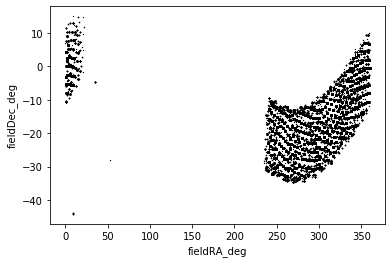

In [17]:
df_first_discovered.plot.scatter('fieldRA_deg','fieldDec_deg', marker='x', s=0.1, c='k')

In [18]:
df_first_discovered['Dec'] = np.deg2rad(df_first_discovered['fieldDec_deg'].values)
ra = df_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_first_discovered['RA'] = -np.deg2rad(ra)

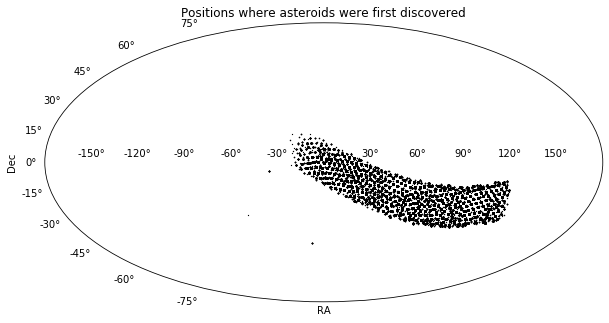

In [19]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title(f'Positions where asteroids were first discovered')
df_first_discovered.plot.scatter('RA','Dec',ax=ax,c='k',s=0.1,marker='x')

In [20]:
df_orbit = pd.read_csv('../results/real_data/orbits.csv')
df_orbit

,ObjID,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT
0,K24H05M,1.978432,0.189115,12.373906,70.477184,181.249492,60491.910177,60600.0,COM
1,K22A56H,2.382736,0.150071,12.803460,110.596049,340.762752,61233.529925,60600.0,COM
2,K24RC8T,2.318348,0.270104,15.062575,203.688594,174.991177,60595.435175,60600.0,COM
3,K14Wh7L,2.186412,0.149198,10.063611,43.278652,329.769900,59829.325713,60000.0,COM
4,K08H15U,4.916185,0.072917,10.363971,133.267690,207.598148,60198.367211,60800.0,COM
...,...,...,...,...,...,...,...,...,...
1442120,K21O07P,2.194100,0.188609,12.900423,178.265694,125.121604,59365.079752,60800.0,COM
1442121,K21RH9J,2.772692,0.074731,11.280710,149.017746,126.975428,59041.205791,60800.0,COM
1442122,K21V23V,2.896559,0.048025,17.973951,223.686592,335.787005,60309.432530,60800.0,COM
1442123,K14N92T,2.904595,0.077896,10.667483,106.591061,217.142064,61089.549426,60800.0,COM


In [21]:
def compute_orbit_type(df):
    q = df["q"].values
    e = df["e"].values
    i = df["inc"].values

    # Derived quantities
    a = q / (1 - e)
    Q = a * (1 + e)
    T = (5.2 / a) + 2 * np.cos(np.radians(i)) * np.sqrt((a / 5.2) * (1 - e**2))

    # Constants
    a_jup = 5.2
    a_nep = 30.1
    q_mars = 1.666

    # Default to "Unusual Other"
    result = np.full(len(df), 99)
    unclassified = np.full(len(df), True)

    def assign(mask, code):
        nonlocal result, unclassified
        update = mask & unclassified
        result[update] = code
        unclassified[update] = False

    assign(e > 1, 30)                                  # Hyperbolic
    assign(e == 1, 31)                                 # Parabolic
    assign((a < 1) & (Q < 0.983), 0)                   # Atira
    assign((a < 1) & (Q >= 0.983), 1)                  # Aten
    assign((a >= 1) & (q < 1.017), 2)                  # Apollo
    assign((a >= 1) & (q >= 1.017) & (q < 1.3), 3)     # Amor
    assign((a >= 1) & (Q < q_mars), 9)                 # Inner Other
    assign((1 <= a) & (a < 3.2) & (q >= 1.3) & (q < q_mars), 10)  # Mars Crosser
    assign((1 <= a) & (a < 3.27831) & (i < 75), 11)    # Main Belt
    assign((4.8 < a) & (a < 5.4) & (e < 0.3), 12)      # Jupiter Trojan
    assign((a < a_jup), 19)                            # Middle Other
    assign((a >= 1) & (T > 2) & (T < 3), 20)           # Jupiter Coupled
    assign((29.8 < a) & (a < 30.4), 21)                # Neptune Trojan
    assign((a_jup <= a) & (a < a_nep), 22)             # Centaur
    assign((a >= a_nep), 23)                           # TNO

    return result


In [22]:
df_orbit['Type'] = compute_orbit_type(df_orbit)

In [23]:
df_orbit

,ObjID,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT,Type
0,K24H05M,1.978432,0.189115,12.373906,70.477184,181.249492,60491.910177,60600.0,COM,11
1,K22A56H,2.382736,0.150071,12.803460,110.596049,340.762752,61233.529925,60600.0,COM,11
2,K24RC8T,2.318348,0.270104,15.062575,203.688594,174.991177,60595.435175,60600.0,COM,11
3,K14Wh7L,2.186412,0.149198,10.063611,43.278652,329.769900,59829.325713,60000.0,COM,11
4,K08H15U,4.916185,0.072917,10.363971,133.267690,207.598148,60198.367211,60800.0,COM,12
...,...,...,...,...,...,...,...,...,...,...
1442120,K21O07P,2.194100,0.188609,12.900423,178.265694,125.121604,59365.079752,60800.0,COM,11
1442121,K21RH9J,2.772692,0.074731,11.280710,149.017746,126.975428,59041.205791,60800.0,COM,11
1442122,K21V23V,2.896559,0.048025,17.973951,223.686592,335.787005,60309.432530,60800.0,COM,11
1442123,K14N92T,2.904595,0.077896,10.667483,106.591061,217.142064,61089.549426,60800.0,COM,11


In [24]:
df_real = pd.merge(df_first_discovered, df_orbit, on='ObjID')

In [25]:
df_real

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,...,RA,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT,Type
0,K05T38Q,60847.146782,-100.968583,-16.841287,260.232304,-15.855056,0.000006,i,21.853584,0.040200,...,1.762234,2.048540,0.212536,4.890552,177.508842,238.225582,59906.086487,60400.0,COM,11
1,K13Y17V,60847.146782,-100.968583,-16.841287,258.550160,-16.755462,0.000005,i,21.552069,0.028546,...,1.762234,1.953089,0.130989,4.763493,135.440926,323.967676,59072.700626,60200.0,COM,11
2,K09Y14Q,60847.148941,-113.855494,-11.839659,244.723451,-11.375593,0.000006,i,22.082910,0.042914,...,1.987153,2.345277,0.141183,16.778013,96.377178,330.141557,59990.828104,60400.0,COM,11
3,K09VA5D,60847.149923,-116.948189,-11.035343,243.161196,-11.103452,0.000007,i,22.390791,0.053954,...,2.041131,1.763092,0.329598,7.408566,180.784157,215.401852,59797.507919,60000.0,COM,11
4,K21PK4D,60847.150434,-119.529000,-12.895619,240.455986,-12.959177,0.000006,i,22.164864,0.045013,...,2.086175,2.441696,0.110440,5.042146,146.828646,179.007351,59473.515779,60600.0,COM,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203943,K25D22N,60864.335709,10.226789,2.205349,9.589006,3.714539,0.000016,y,21.196073,0.103189,...,-0.178491,0.894793,0.541479,3.795790,299.101571,302.415126,59824.653118,60800.0,COM,2
203944,J99X65C,60864.339637,14.915595,-3.653653,15.960733,-3.042376,0.000004,z,19.970460,0.015026,...,-0.260326,2.439616,0.092708,8.108256,80.876435,295.130623,59354.599325,60400.0,COM,11
203945,K15RE3M,60865.360421,5.452427,0.177245,6.273788,0.831025,0.000011,z,21.565061,0.076826,...,-0.095163,2.690557,0.075242,8.879412,155.785195,261.988924,59375.802300,60600.0,COM,11
203946,K14QD9N,60866.305385,16.011966,4.721768,17.577107,5.059516,0.000032,z,21.845312,0.160327,...,-0.279462,2.759223,0.101553,2.374942,116.117620,230.877945,58855.676162,59200.0,COM,11


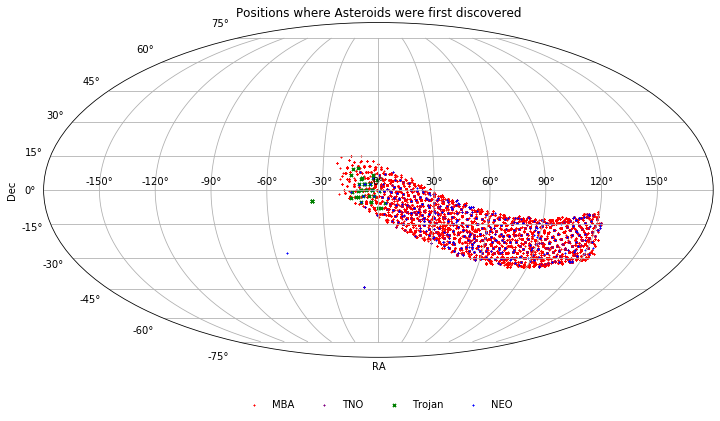

In [26]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title(f'Positions where asteroids were first discovered')
df_real_mba = df_real.query('Type == 11')
df_real_tno = df_real.query('Type == 23')
df_real_trojan = df_real.query('Type == 12')
df_real_neo = df_real.query('Type == 0 or Type == 1 or Type == 2 or Type == 3')
df_real_mba.plot.scatter('RA','Dec',ax=ax,c='r',s=1,marker='x', label='MBA')
df_real_tno.plot.scatter('RA','Dec',ax=ax,c='purple',s=1,marker='x', label='TNO')
df_real_trojan.plot.scatter('RA','Dec',ax=ax,c='green',s=10,marker='x', label='Trojan')
df_real_neo.plot.scatter('RA','Dec',ax=ax,c='blue',s=1,marker='x', label='NEO')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
ax.grid()

In [ ]:
directory = Path("../results/real_asteroids")
directory.mkdir(parents=True, exist_ok=True)

In [27]:
! rm -f ../results/real_asteroids/*.png

for t in range(94):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='mollweide')
    ax.set_title(f'Night: {t+1}')
    df_first_discovered_night = df_first_discovered.query(f'night == {t}')
    df_previous_discovered_night = df_first_discovered.query(f'night < {t}')
    #df_previous_discovered_night.plot.scatter('RA','Dec',ax=ax,c='gray',s=0.01,marker='x',label='Previous nights')
    df_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='r',s=0.5,marker='x', label='Current night')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
    ax.text(np.deg2rad(15), np.deg2rad(45),f'Total discoveries: {df_previous_discovered_night.shape[0]}')
    ax.text(np.deg2rad(15), np.deg2rad(35),f'Night {t+1} discoveries: {df_first_discovered_night.shape[0]}')
    #plt.show()
    fig.savefig(f'../results/real_asteroids/frame_{t:05d}.png')
    plt.close()

In [28]:
framerate = 15

In [29]:
! cd ../results/real_asteroids && ffmpeg -framerate {framerate} -i "frame_%05d.png" -c:v libx264 -pix_fmt yuv420p ../real_asteroids.mp4 -y

ffmpeg version 5.1.6 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64-v2 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crysta

# Simulated asteroids visualization

The code below generates a movie from the simulation data located in the `../simulation` directory. It shows the positions where asteroids were first discovered in our simulations.

In [30]:
df_mba = pd.read_csv('../results/sim-outputs/mba/e2e_mba.csv')
df_mba_stats = pd.read_csv('../results/sim-outputs/mba/stats_mba.csv')
df_mba_disc = df_mba_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_mba['night'] = (df_mba['fieldMJD_TAI'] - 60847).astype('int')
df_mba['dateMJD'] = (df_mba['fieldMJD_TAI'].astype('int')).astype('float')
df_mba_unique_nights = df_mba.drop_duplicates(subset="ObjID", keep="first")
df_mba_first_discovered = pd.merge(df_mba_unique_nights, df_mba_disc, on='ObjID')
df_mba_first_discovered['Dec'] = np.deg2rad(df_mba_first_discovered['fieldDec_deg'].values)
ra = df_mba_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_mba_first_discovered['RA'] = -np.deg2rad(ra)

df_trojan = pd.read_csv('../results/sim-outputs/trojans/e2e_trojans.csv')
df_trojan_stats = pd.read_csv('../results/sim-outputs/trojans/stats_trojans.csv')
df_trojan_disc = df_trojan_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_trojan['night'] = (df_trojan['fieldMJD_TAI'] - 60847).astype('int')
df_trojan['dateMJD'] = (df_trojan['fieldMJD_TAI'].astype('int')).astype('float')
df_trojan_unique_nights = df_trojan.drop_duplicates(subset="ObjID", keep="first")
df_trojan_first_discovered = pd.merge(df_trojan_unique_nights, df_trojan_disc, on='ObjID')
df_trojan_first_discovered['Dec'] = np.deg2rad(df_trojan_first_discovered['fieldDec_deg'].values)
ra = df_trojan_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_trojan_first_discovered['RA'] = -np.deg2rad(ra)

df_tno = pd.read_csv('../results/sim-outputs/tno/e2e_tno.csv')
df_tno_stats = pd.read_csv('../results/sim-outputs/tno/stats_tno.csv')
df_tno_disc = df_tno_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_tno['night'] = (df_tno['fieldMJD_TAI'] - 60847).astype('int')
df_tno['dateMJD'] = (df_tno['fieldMJD_TAI'].astype('int')).astype('float')
df_tno_unique_nights = df_tno.drop_duplicates(subset="ObjID", keep="first")
df_tno_first_discovered = pd.merge(df_tno_unique_nights, df_tno_disc, on='ObjID')
df_tno_first_discovered['Dec'] = np.deg2rad(df_tno_first_discovered['fieldDec_deg'].values)
ra = df_tno_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_tno_first_discovered['RA'] = -np.deg2rad(ra)

df_neo = pd.read_csv('../results/sim-outputs/neo/e2e.csv')
df_neo_stats = pd.read_csv('../results/sim-outputs/neo/stats.csv')
df_neo_disc = df_neo_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_neo['night'] = (df_neo['fieldMJD_TAI'] - 60847).astype('int')
df_neo['dateMJD'] = (df_neo['fieldMJD_TAI'].astype('int')).astype('float')
df_neo_unique_nights = df_neo.drop_duplicates(subset="ObjID", keep="first")
df_neo_first_discovered = pd.merge(df_neo_unique_nights, df_neo_disc, on='ObjID')
df_neo_first_discovered['Dec'] = np.deg2rad(df_neo_first_discovered['fieldDec_deg'].values)
ra = df_neo_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_neo_first_discovered['RA'] = -np.deg2rad(ra)

In [37]:
df_mba_first_discovered

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night,dateMJD,date_linked_MJD,Dec,RA
0,S10000jza,60847.147381,-104.764681,-13.581529,255.647583,-13.395837,0.000003,i,17.259478,0.001808,23.775703,5.672137,2.924867e+08,3.311451,4.403093e+08,0,60847.0,60857.0,-0.237042,1.828489
1,S10000F5a,60847.147907,-107.765079,-13.082034,252.809258,-12.217997,0.000003,i,18.925182,0.004500,23.757688,6.601320,2.960506e+08,5.034609,4.422578e+08,0,60847.0,60857.0,-0.228325,1.880855
2,S10001Aha,60847.147907,-107.765079,-13.082034,252.756672,-13.880445,0.000003,i,18.773566,0.004111,23.760491,6.599582,2.754152e+08,7.385858,4.222869e+08,0,60847.0,60857.0,-0.228325,1.880855
3,S1000095a,60847.148429,-110.793089,-12.511995,249.000262,-11.751775,0.000003,i,17.811842,0.002335,23.816309,7.851636,2.879404e+08,8.391567,4.320926e+08,0,60847.0,60857.0,-0.218376,1.933704
4,S10001lxa,60847.148941,-113.855494,-11.839659,246.614529,-11.947837,0.000003,i,17.889214,0.002296,23.935251,8.427106,2.910260e+08,7.135871,4.338071e+08,0,60847.0,60857.0,-0.206641,1.987153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393117,S101yhtMa,60858.190541,-107.835805,-32.050710,252.779661,-30.773635,0.000023,z,22.119470,0.163212,22.490093,13.705948,1.403965e+08,7.126825,2.848093e+08,11,60858.0,60867.0,-0.559390,1.882090
393118,S101yisfa,60858.217843,-38.196722,-18.377700,320.873182,-19.199566,0.000013,r,22.525889,0.081950,23.498153,18.449745,1.540782e+08,-13.229423,2.902235e+08,11,60858.0,60864.0,-0.320751,0.666659
393119,S101yhC6a,60858.265725,-21.045226,-1.291409,338.774479,-0.534258,0.000009,i,22.418405,0.061548,23.785716,27.974897,1.728932e+08,-15.794948,2.813564e+08,11,60858.0,60865.0,-0.022539,0.367308
393120,S101yfJAa,60863.268977,-16.061746,-10.226836,344.064835,-10.269269,0.000043,i,23.583587,0.209778,23.343341,21.134569,2.434238e+08,-18.669157,3.512595e+08,16,60863.0,60877.0,-0.178492,0.280330


In [39]:
import astropy
from astropy.time import Time

In [ ]:
directory = Path("../results/simulated_asteroids")
directory.mkdir(parents=True, exist_ok=True)

In [47]:
for t in range(28):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='mollweide')
    frame_time = Time(t+60847.0, format='mjd')
    utc_time = frame_time.datetime.strftime("%Y-%m-%d")
    ax.set_title(f'Time: {utc_time}')
    df_mba_first_discovered_night = df_mba_first_discovered.query(f'night == {t}')
    df_trojan_first_discovered_night = df_trojan_first_discovered.query(f'night == {t}')
    df_tno_first_discovered_night = df_tno_first_discovered.query(f'night == {t}')
    df_neo_first_discovered_night = df_neo_first_discovered.query(f'night == {t}')
    
    df_mba_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='r',s=1,marker='x', label='MBA')
    df_trojan_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='blue',s=1,marker='x', label='Trojans')
    df_neo_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='green',s=1,marker='x', label='NEO')
    df_tno_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='purple',s=1,marker='x', label='TNO')
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
    #ax.text(np.deg2rad(15), np.deg2rad(45),f'Total discoveries: {df_previous_discovered_night.shape[0]}')
    #ax.text(np.deg2rad(15), np.deg2rad(35),f'Night {t+1} discoveries: {df_first_discovered_night.shape[0]}')
    #plt.show()
    fig.savefig(f'../results/simulated_asteroids/frame_{t:05d}.png')
    plt.close()

In [35]:
framerate = 1

In [36]:
! cd ../results/simulated_asteroids && ffmpeg -framerate {framerate} -i "frame_%05d.png" -c:v libx264 -pix_fmt yuv420p ../simulated_asteroids.mp4 -y

ffmpeg version 5.1.6 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64-v2 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crysta